In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo

In [16]:
df = pd.read_csv('../static/blackfridaysale/train.csv')

In [17]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [18]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [20]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [28]:
# df.drop(['Product_Category_2', 'Product_Category_3'], axis = 1, inplace = True)

del df['Product_Category_2']
del df['Product_Category_3']

In [29]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [30]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

In [31]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [32]:
df['User_ID'].nunique()

5891

In [33]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [34]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Purchase                      18105
dtype: int64

In [44]:
data = pd.DataFrame({'Ratio' : [len(df[df['Gender'] == 'M']), len(df[df['Gender'] == 'F'])]}, 
                    index = ['Male', 'Female'])
data.head()

,Ratio
Male,414259
Female,135809


<AxesSubplot:ylabel='Ratio'>

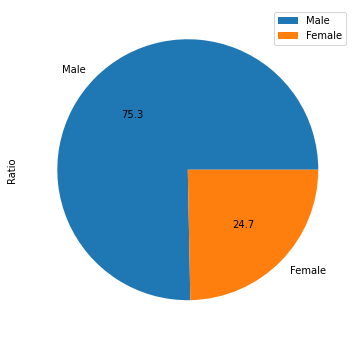

In [45]:
data.plot.pie(y = 'Ratio', figsize = (6,6), autopct = "%.1f")

<AxesSubplot:title={'center':'Gender Ratio'}, ylabel='None'>

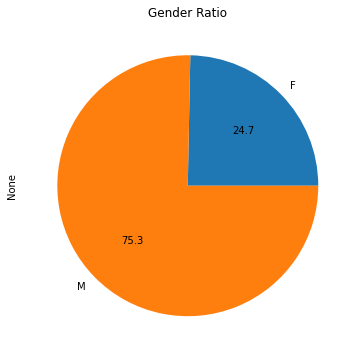

In [46]:
df.groupby('Gender').size().plot(kind = 'pie', autopct = "%.1f", title = 'Gender Ratio', figsize = (6,6))

<AxesSubplot:ylabel='None'>

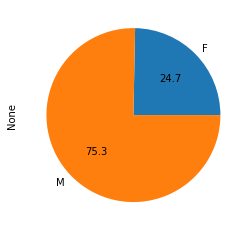

In [50]:
df.groupby('Gender').size().plot.pie(autopct = '%.1f')

<AxesSubplot:ylabel='Purchase'>

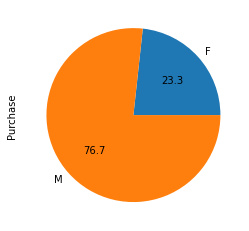

In [51]:
df.groupby('Gender').sum()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")

<AxesSubplot:ylabel='Purchase'>

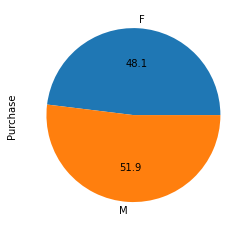

In [52]:
df.groupby('Gender').mean()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")

<AxesSubplot:title={'center':'Purchase Distribution by Age'}, xlabel='Age'>

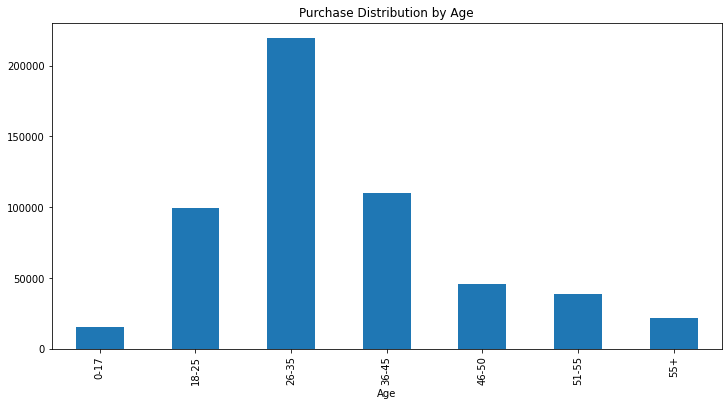

In [53]:
df.groupby('Age').size().plot(kind = 'bar', figsize = (12, 6), title = 'Purchase Distribution by Age')

<AxesSubplot:xlabel='Age'>

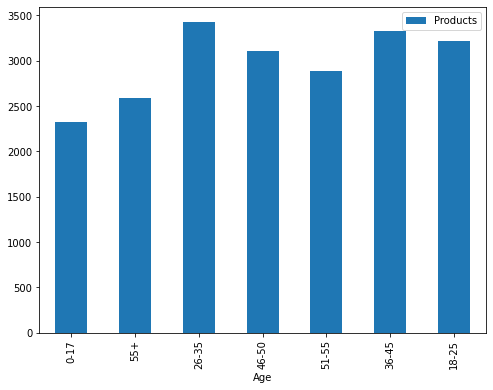

In [55]:
lst = []
for i in df['Age'].unique():
    lst.append([i, df[df['Age'] == i]['Product_ID'].nunique()])
    
data = pd.DataFrame(lst , columns = ['Age','Products'])

data.plot.bar(x = 'Age', figsize = (8,6))

<AxesSubplot:title={'center':'Amount Spend by Age'}, xlabel='Age'>

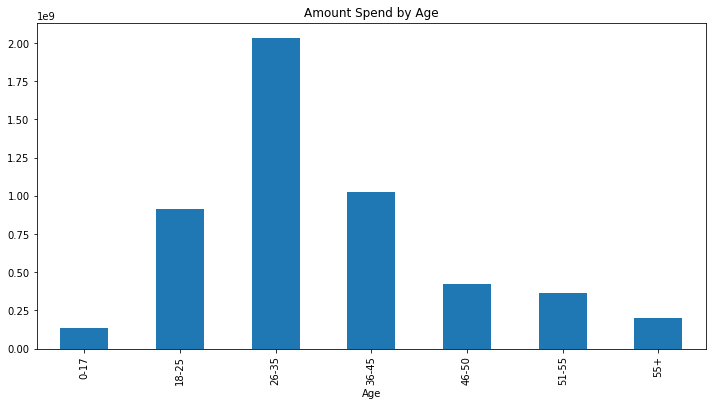

In [56]:
df.groupby('Age').sum()['Purchase'].plot(kind = 'bar', figsize = (12, 6), title = 'Amount Spend by Age')

<AxesSubplot:title={'center':'Amount Spend by Age'}, xlabel='Age'>

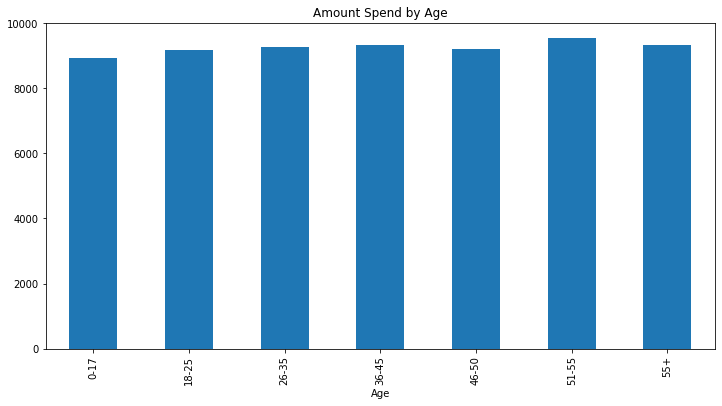

In [57]:
df.groupby('Age').mean()['Purchase'].plot(kind = 'bar', figsize = (12, 6), title = 'Amount Spend by Age')

<AxesSubplot:ylabel='Purchase'>

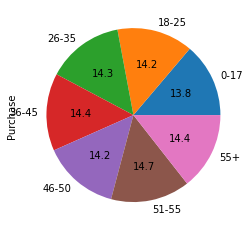

In [58]:
df.groupby('Age').mean()['Purchase'].plot(kind = 'pie', autopct = '%0.1f')

<AxesSubplot:ylabel='None'>

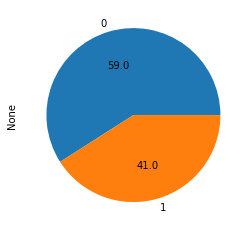

In [59]:
df.groupby('Marital_Status').size().plot(kind = 'pie', autopct = '%0.1f')

<AxesSubplot:ylabel='None'>

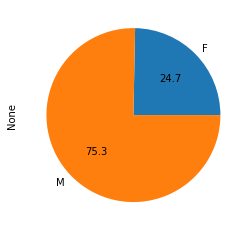

In [60]:
df.groupby('Gender').size().plot(kind = 'pie', autopct = '%0.1f')

<AxesSubplot:xlabel='Age', ylabel='count'>

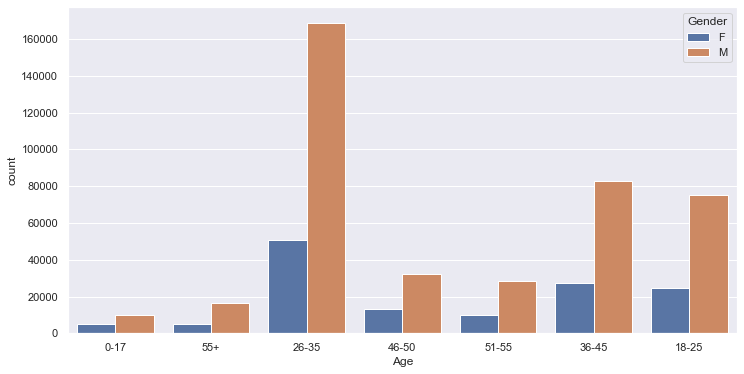

In [61]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = "Age", hue = 'Gender', data = df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

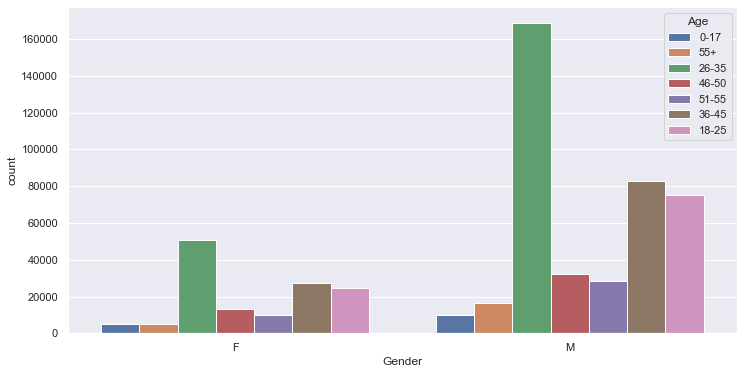

In [62]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = "Gender", hue = 'Age', data = df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

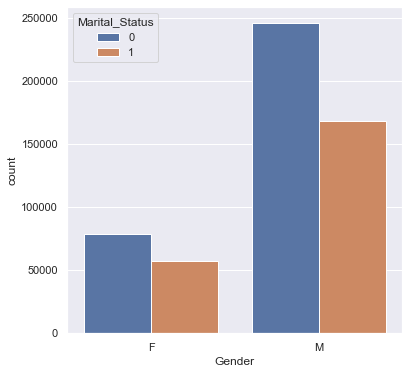

In [63]:
sns.set(rc = {'figure.figsize' : (6,6)})
sns.countplot(x = "Gender", hue = 'Marital_Status', data = df)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

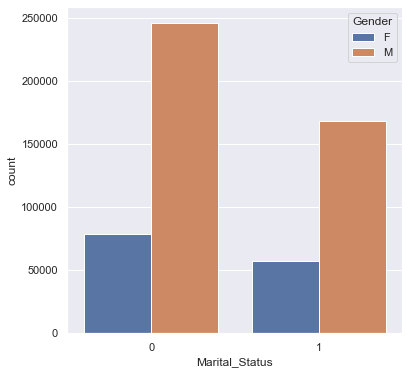

In [64]:
sns.set(rc = {'figure.figsize' : (6,6)})
sns.countplot(x = "Marital_Status", hue = 'Gender', data = df)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

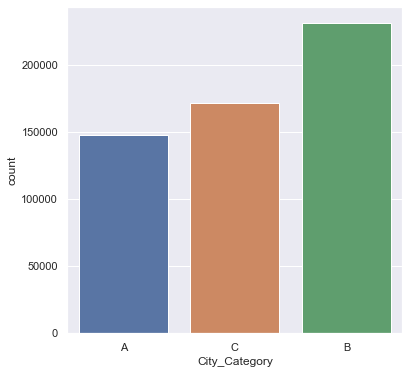

In [65]:
sns.countplot(x = df['City_Category'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

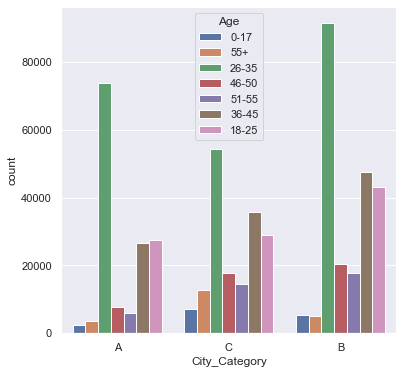

In [66]:
sns.countplot(x = 'City_Category', hue = 'Age', data = df)

<AxesSubplot:xlabel='Age', ylabel='count'>

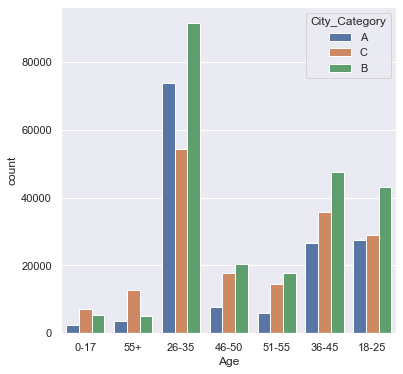

In [67]:
sns.countplot(x = 'Age', hue = 'City_Category', data = df)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

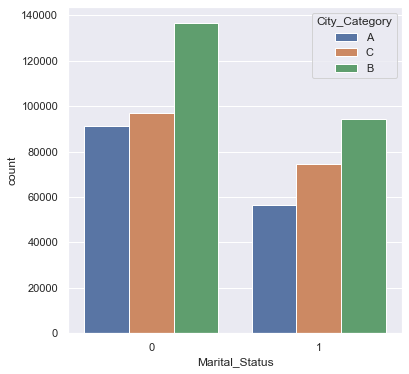

In [68]:
sns.countplot(x = 'Marital_Status', hue = 'City_Category', data = df)

<AxesSubplot:ylabel='None'>

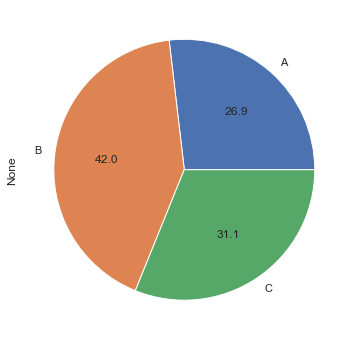

In [69]:
df.groupby('City_Category').size().plot(kind = 'pie', autopct = '%0.1f')

<AxesSubplot:xlabel='City_Category', ylabel='count'>

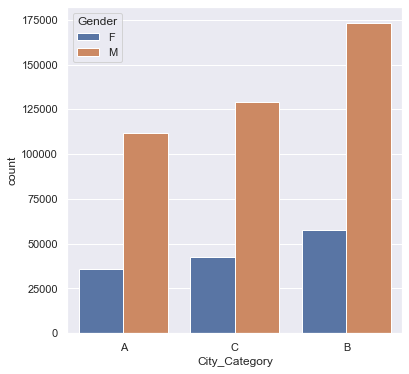

In [70]:
sns.countplot(x = 'City_Category', hue = 'Gender', data = df)

<AxesSubplot:ylabel='Purchase'>

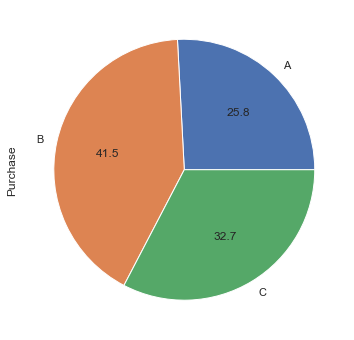

In [71]:
df.groupby('City_Category').sum()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")

<AxesSubplot:ylabel='Purchase'>

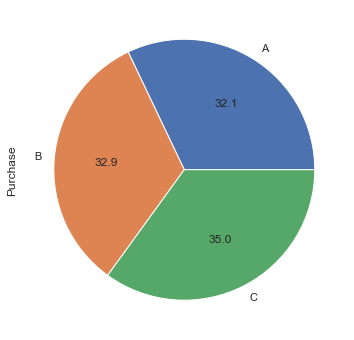

In [72]:
df.groupby('City_Category').mean()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

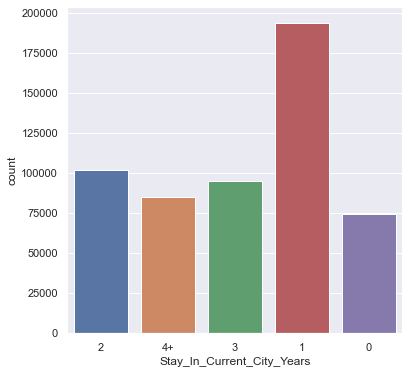

In [73]:
sns.countplot(x = df['Stay_In_Current_City_Years'])

<AxesSubplot:ylabel='None'>

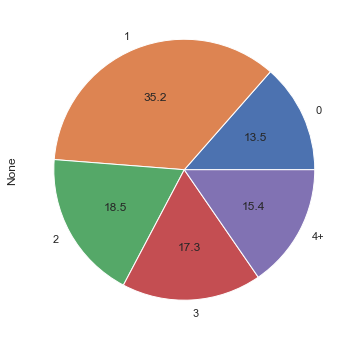

In [74]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind = 'pie', autopct = "%.1f")

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

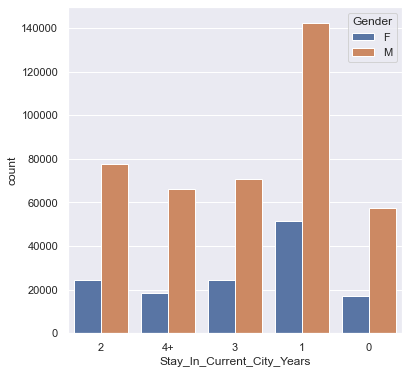

In [75]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Gender', data = df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

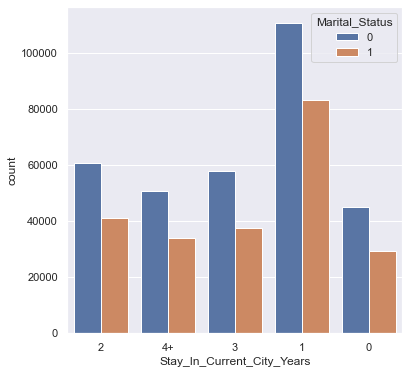

In [76]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Marital_Status', data = df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

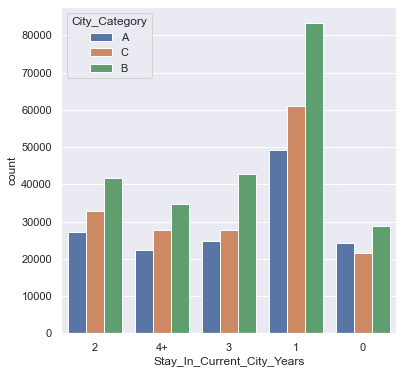

In [77]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'City_Category', data = df)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

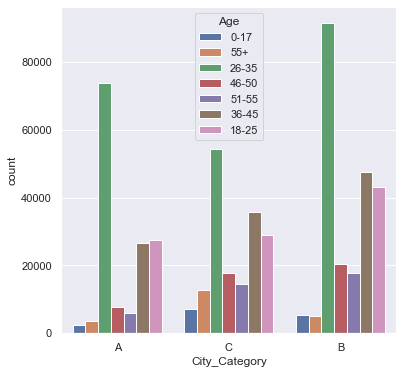

In [78]:
sns.countplot(x = 'City_Category', hue = 'Age',data = df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years'>

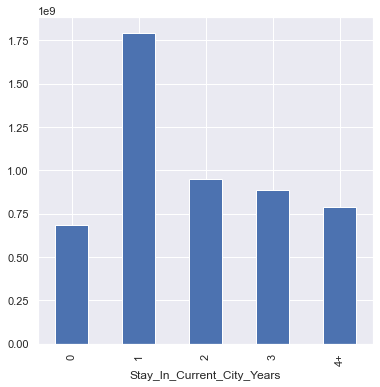

In [79]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind = 'bar')

<AxesSubplot:xlabel='Stay_In_Current_City_Years'>

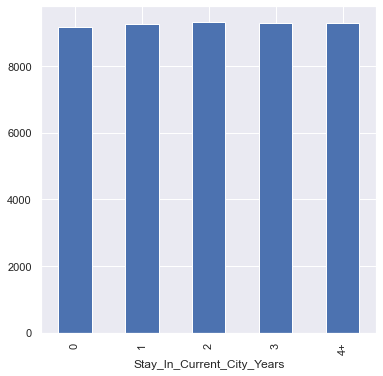

In [80]:
df.groupby('Stay_In_Current_City_Years').mean()['Purchase'].plot(kind = 'bar')

<AxesSubplot:xlabel='Occupation', ylabel='count'>

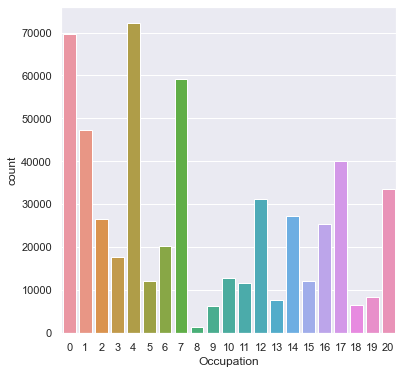

In [81]:
sns.countplot(x = df['Occupation'])

<AxesSubplot:xlabel='Occupation'>

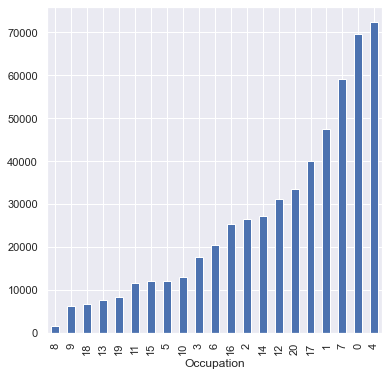

In [82]:
df.groupby('Occupation').size().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Occupation'>

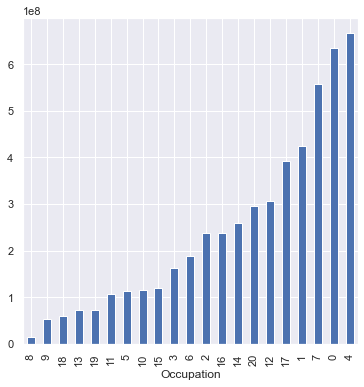

In [83]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Occupation'>

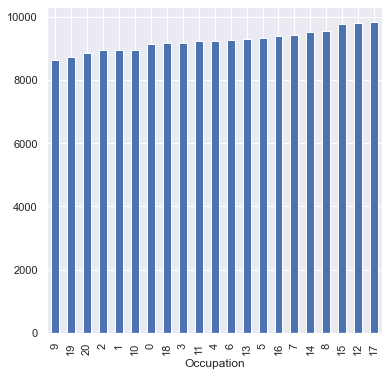

In [85]:
df.groupby('Occupation').mean()['Purchase'].sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Occupation', ylabel='count'>

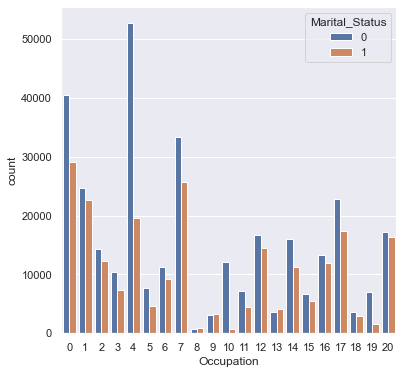

In [86]:
sns.countplot(x = 'Occupation', hue = 'Marital_Status', data = df)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

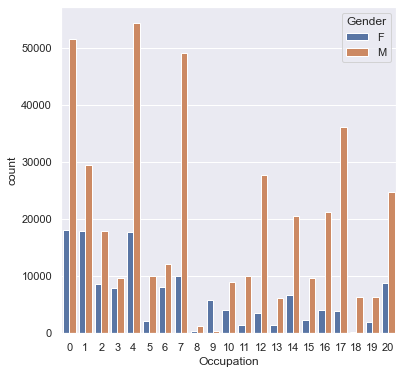

In [87]:
sns.countplot(x = 'Occupation', hue = 'Gender', data = df)

<AxesSubplot:xlabel='Occupation'>

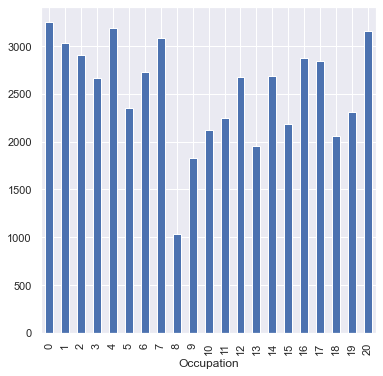

In [88]:
df.groupby('Occupation').nunique()['Product_ID'].plot(kind = 'bar')

<AxesSubplot:xlabel='Occupation'>

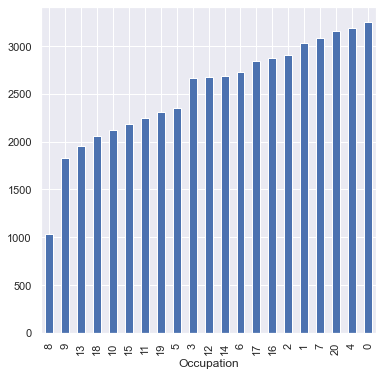

In [89]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_Category_1'>

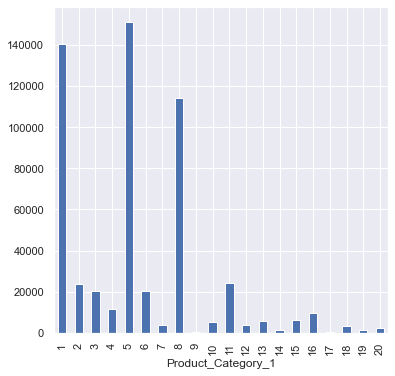

In [90]:
df.groupby('Product_Category_1').size().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_Category_1'>

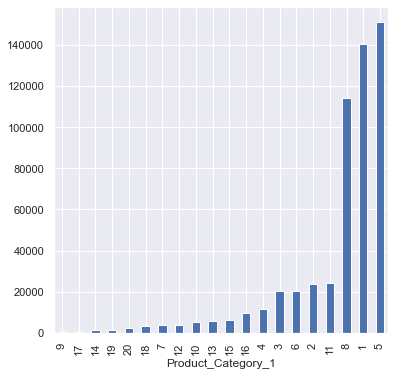

In [91]:
df.groupby('Product_Category_1').size().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_Category_1'>

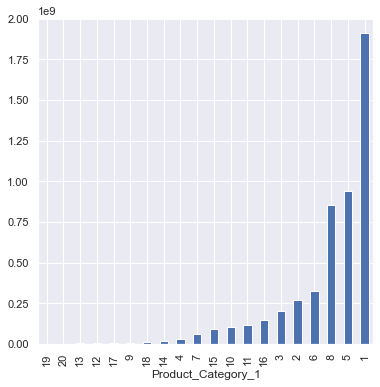

In [92]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_Category_1'>

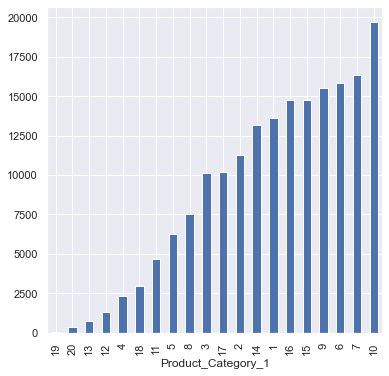

In [93]:
df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_ID'>

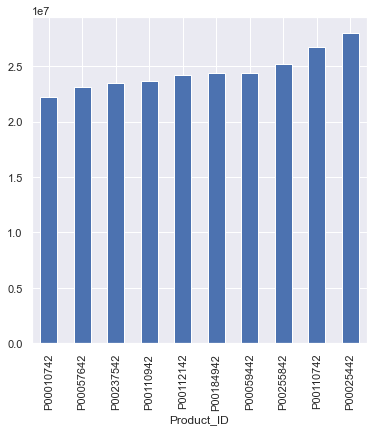

In [94]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_ID'>

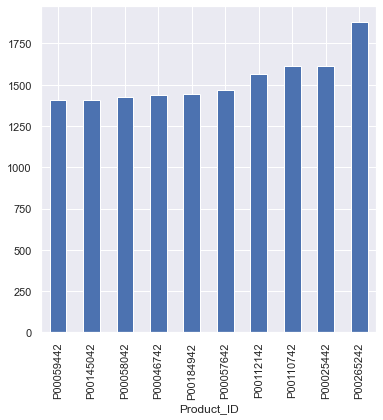

In [95]:
df.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_ID'>

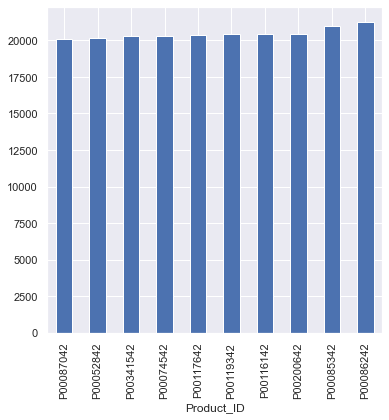

In [96]:
df.groupby('Product_ID').mean()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

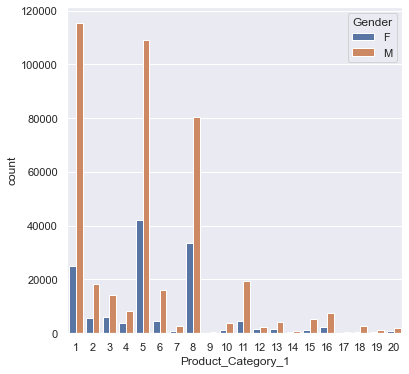

In [97]:
sns.countplot(x = 'Product_Category_1', hue = 'Gender', data = df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

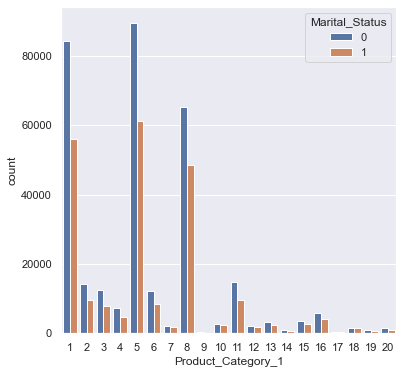

In [98]:
sns.countplot(x = 'Product_Category_1', hue = 'Marital_Status', data = df)

In [99]:
l = []
for i in range(len(df)):
    l.append(df['Gender'][i] +"_"+ str(df['Marital_Status'][i]))

df['MaritalGender'] = l

In [100]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<AxesSubplot:xlabel='MaritalGender', ylabel='count'>

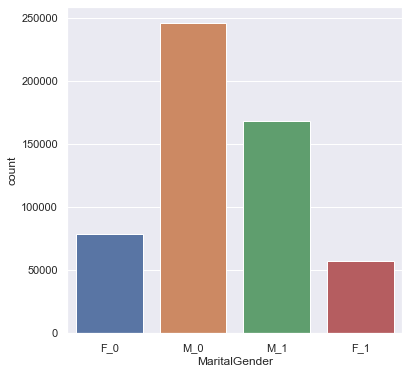

In [101]:
sns.countplot(x = df['MaritalGender'])

<AxesSubplot:xlabel='Age', ylabel='count'>

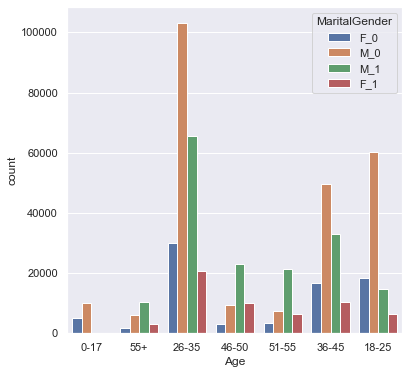

In [102]:
sns.countplot(x = df['Age'], hue = df['MaritalGender'])

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

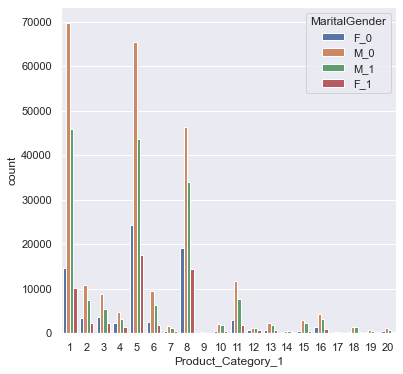

In [103]:
sns.countplot(x = df['Product_Category_1'], hue = df['MaritalGender'])

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

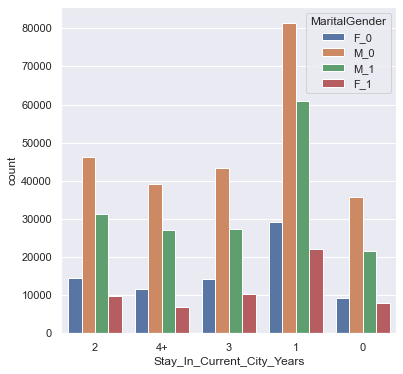

In [104]:
sns.countplot(x = df['Stay_In_Current_City_Years'], hue = df['MaritalGender'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

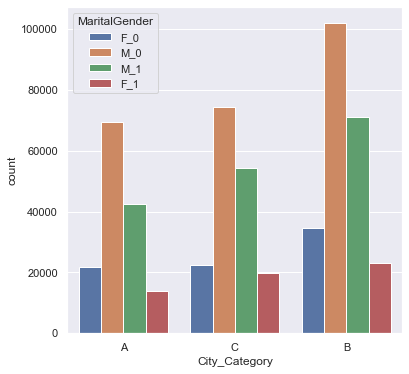

In [105]:
sns.countplot(x = df['City_Category'], hue = df['MaritalGender'])